In [5]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 133.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 124.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 121.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.7 MB/s eta 0:00:00


In [1]:
!pip install nixtla

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from nixtla import NixtlaClient
import os

In [5]:
os.getcwd()

'/home/abubeker_shamil/Scalable_Backtesting_Infrastructure_for_Crypto_Trading'

In [4]:
os.chdir("..")

In [6]:
# 2. Read historic electricity demand data 
df = pd.read_csv('data/binance_btc_usdt_candlestick.csv')

In [7]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2021-06-01,37253.82,37894.81,35666.00,36693.09,81234.663770,1622591999999,2.973928e+09,1760417,40291.834851,1.475008e+09,0
1,2021-06-02,36694.85,38225.00,35920.00,37568.68,67587.372495,1622678399999,2.523463e+09,1530915,34328.496287,1.281854e+09,0
2,2021-06-03,37568.68,39476.00,37170.00,39246.79,75889.106011,1622764799999,2.930945e+09,1949658,38664.297849,1.493505e+09,0
3,2021-06-04,39246.78,39289.07,35555.15,36829.00,91317.799245,1622851199999,3.379400e+09,1926311,43105.971730,1.595098e+09,0
4,2021-06-05,36829.15,37925.00,34800.00,35513.20,70459.621490,1622937599999,2.560547e+09,1463754,34397.774360,1.249708e+09,0


In [35]:
backtest = pd.read_csv('data/aapl.csv', parse_dates=True)

In [36]:
backtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [37]:
backtest.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800


In [38]:
new_df = backtest[['Close', 'Date']]

In [18]:
new_df.reset_index(inplace=True)

In [42]:
new_df.head()

,Close,Date
0,125.070000,2023-01-03
1,126.360001,2023-01-04
2,125.019997,2023-01-05
3,129.619995,2023-01-06
4,130.149994,2023-01-09


In [40]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

/tmp/ipykernel_1318992/2232218329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date'])


In [41]:
renamed_df = new_df.rename(columns={'Date': 'ds', 'Close': 'y'})

In [44]:
renamed_df.head()

,y,ds
0,125.070000,2023-01-03
1,126.360001,2023-01-04
2,125.019997,2023-01-05
3,129.619995,2023-01-06
4,130.149994,2023-01-09


In [43]:
renamed_df.shape

(250, 2)

In [46]:
# make sure the interval is daily consistent
renamed_df = renamed_df.set_index('ds')
renamed_df = renamed_df.asfreq('D')
renamed_df = renamed_df.reset_index()
renamed_df.head()

,ds,y
0,2023-01-03,125.070000
1,2023-01-04,126.360001
2,2023-01-05,125.019997
3,2023-01-06,129.619995
4,2023-01-07,NaN


In [50]:
renamed_df.isna().sum()

ds    0
y     0
dtype: int64

In [49]:
# replace all NaN with average of between previous and next value
renamed_df['y'] = renamed_df['y'].fillna((renamed_df['y'].mean()))

In [52]:
# split the data into train and test
train_df = renamed_df[:-24]
test_df = renamed_df[-24:]

In [53]:
train_df.shape

(337, 2)

In [54]:
test_df.shape

(24, 2)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


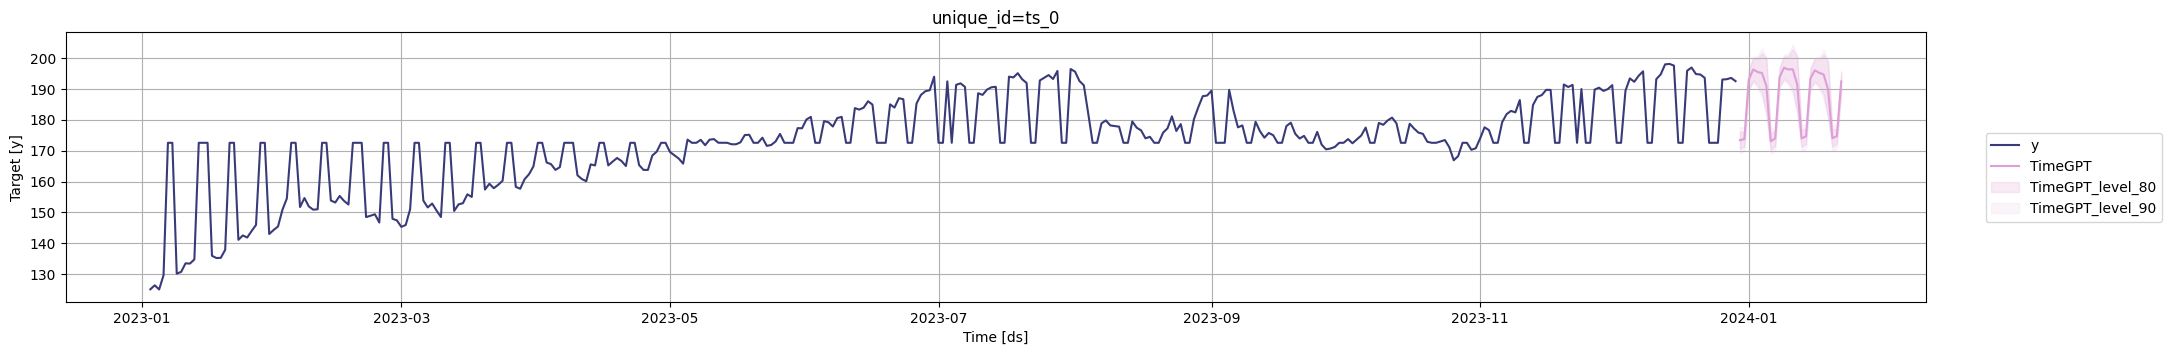

In [51]:
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-31lvshOqu4BTxxhJJY9Y6oxZQHciSZYElRgwsh5Btg60GK5JG3imcfbbUhdSIOyV2HSadFlgdJTpDsJb')

# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(renamed_df, h=24, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(renamed_df, fcst_df, time_col='ds', target_col='y', level=[80, 90])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


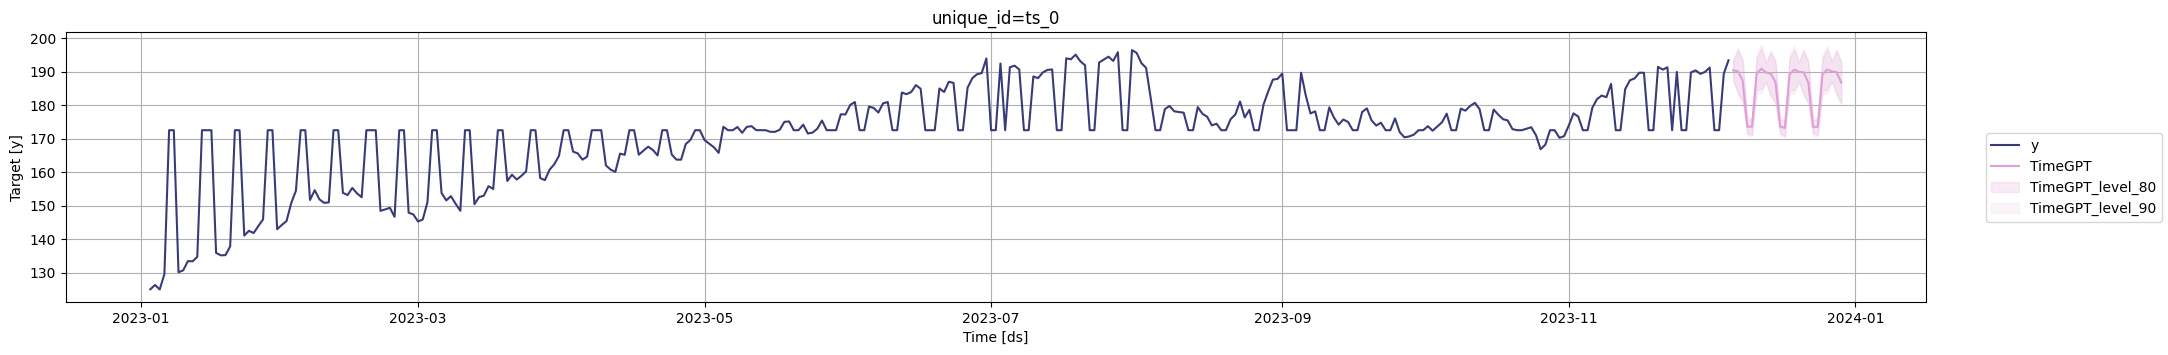

In [56]:
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-31lvshOqu4BTxxhJJY9Y6oxZQHciSZYElRgwsh5Btg60GK5JG3imcfbbUhdSIOyV2HSadFlgdJTpDsJb')

# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(train_df, h=24, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(train_df, fcst_df, time_col='ds', target_col='y', level=[80, 90])

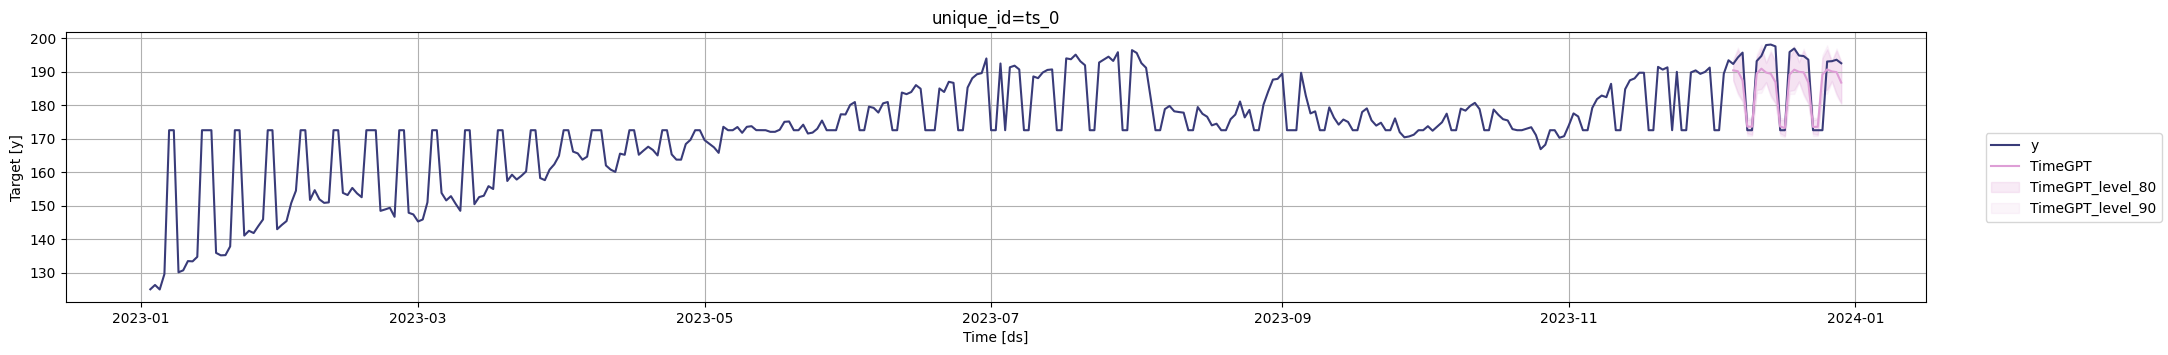

In [57]:
# plot the the original data
nixtla_client.plot(renamed_df, fcst_df, time_col='ds', target_col='y', level=[80, 90])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


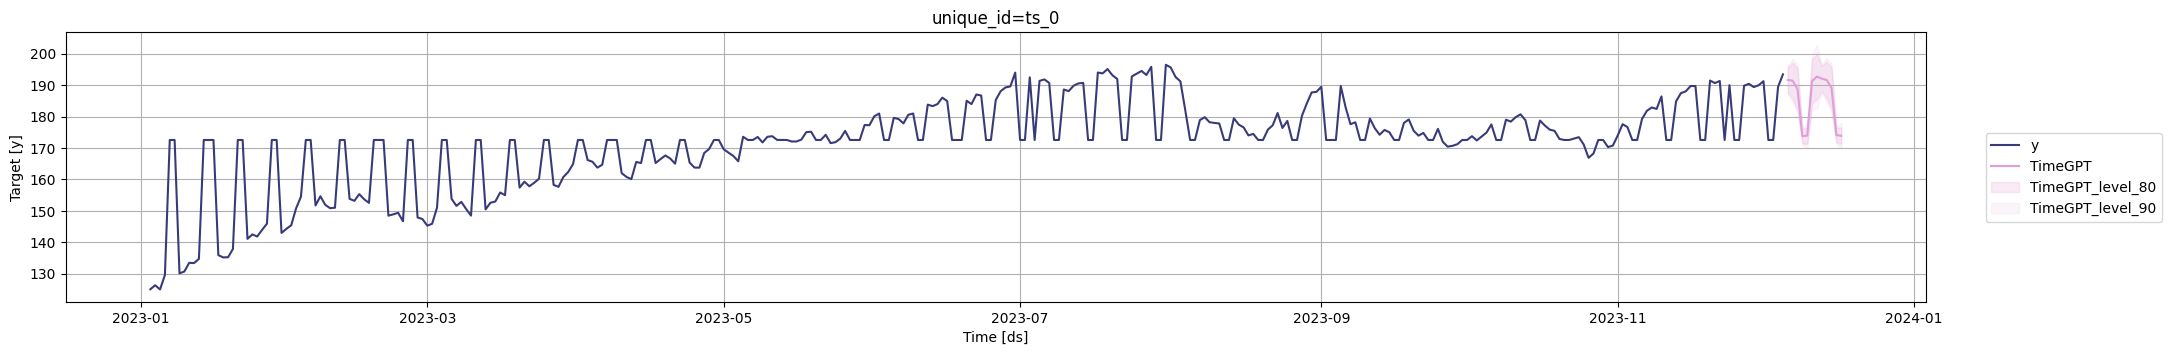

In [64]:
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-31lvshOqu4BTxxhJJY9Y6oxZQHciSZYElRgwsh5Btg60GK5JG3imcfbbUhdSIOyV2HSadFlgdJTpDsJb')

# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(train_df, h=12, level=[80, 90], finetune_steps=12)

# 4. Plot your results (optional)
nixtla_client.plot(train_df, fcst_df, time_col='ds', target_col='y', level=[80, 90])   

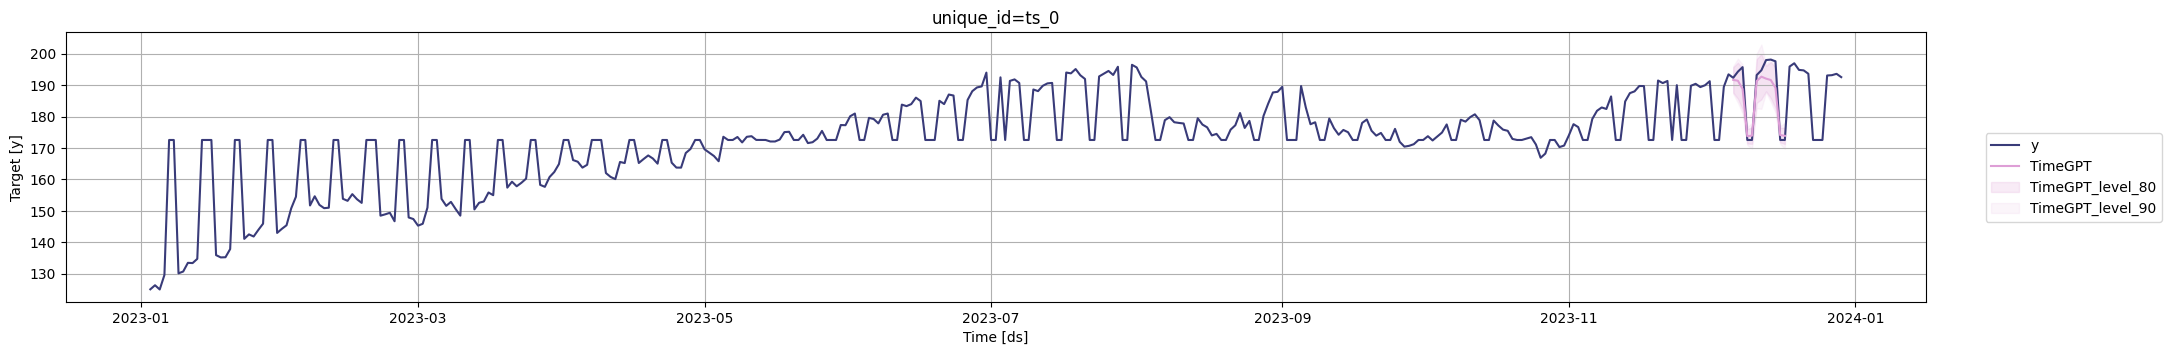

In [65]:
# plot the the original data
nixtla_client.plot(renamed_df, fcst_df, time_col='ds', target_col='y', level=[80, 90])

In [9]:
fcst_df

,unique_id,ds,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,BE,2016-12-31 00:00:00,45.190453,33.008781,35.461378,54.919528,57.372124
1,BE,2016-12-31 01:00:00,43.244446,30.387266,35.374624,51.114267,56.101625
2,BE,2016-12-31 02:00:00,41.958389,29.283794,35.340795,48.575984,54.632985
3,BE,2016-12-31 03:00:00,39.796486,26.262107,32.319258,47.273714,53.330865
4,BE,2016-12-31 04:00:00,39.204536,18.603679,30.985910,47.423163,59.805394
...,...,...,...,...,...,...,...
115,PJM,2018-12-24 19:00:00,32.028286,22.519753,26.569215,37.487357,41.536819
116,PJM,2018-12-24 20:00:00,30.907085,26.465020,26.693781,35.120390,35.349151
117,PJM,2018-12-24 21:00:00,28.066879,19.130772,20.585216,35.548543,37.002987
118,PJM,2018-12-24 22:00:00,25.063723,18.462196,19.388978,30.738467,31.665249


In [ ]:
# 3. Detect Anomalies 
anomalies_df = nixtla_client.detect_anomalies(df, time_col='ds', target_col='y', freq='D')

# 4. Plot your results (optional)
nixtla_client.plot(df, anomalies_df,time_col='ds', target_col='y')

In [ ]:
!pip install statsforecast mlforecast neuralforecast hierarchicalforecast


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# Prepare your data (assuming a pandas DataFrame)
# df should have columns: 'unique_id', 'ds', 'y'
df = scene_data

# Initialize the forecaster
sf = StatsForecast(
    models=[AutoARIMA(season_length=12)],
    freq='M'
)

# Fit the model
sf.fit(df)

# Make predictions
predictions = sf.predict(h=12, level=[95])


In [1]:
!pip install tensorflow


  Using cached tensorflow-2.16.1-cp312-cp312-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.5-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0.tar.gz (406 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached libclang-18.1.1-py2.py3-none-manylinux2014_aarch64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_aarch64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-

In [9]:
!pip install scikit-learn -q

In [1]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [7]:
def train_lstm_model(model, X_train, y_train, epochs=50, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return model


In [5]:
import os
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week9\\Scalable_Backtesting_Infrastructure_for_Crypto_Trading'

In [4]:
os.chdir('..')

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def prepare_lstm_data(df, target_column, seq_length):
    data = df[target_column].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X = []
    y = []
    for i in range(seq_length, len(scaled_data)):
        X.append(scaled_data[i-seq_length:i, 0])
        y.append(scaled_data[i, 0])
    
    # Convert lists to numpy arrays
    X, y = np.array(X), np.array(y)
    
    # Debugging statements
    print(f"Length of scaled_data: {len(scaled_data)}")
    print(f"Length of X: {len(X)}")
    print(f"Shape of X before reshape: {X.shape}")
    
    # Check if X is not empty and has the correct shape
    if X.size == 0:
        raise ValueError("The sequence length is too large for the dataset. Reduce the sequence length.")
    
    # Ensure X has the correct number of dimensions
    if len(X.shape) != 2:
        raise ValueError(f"Expected 2D array for X but got {X.shape}")
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler


In [11]:

# Example usage
df = pd.read_csv('data/binance_btc_usdt_candlestick.csv', index_col='timestamp', parse_dates=True)
X, y, scaler = prepare_lstm_data(df, 'close', seq_length=20)
print(f"Shape of X after reshape: {X.shape}")


Length of scaled_data: 31
Length of X: 11
Shape of X before reshape: (11, 20)
Shape of X after reshape: (11, 20, 1)


In [8]:
df = pd.read_csv('data/binance_btc_usdt_candlestick.csv', index_col='timestamp', parse_dates=True)
X, y, scaler = prepare_lstm_data(df, 'close', seq_length=20)
input_shape = (X.shape[1], 1)

lstm_model = build_lstm_model(input_shape)
lstm_model = train_lstm_model(lstm_model, X, y, epochs=50, batch_size=32)

# Save the model and scaler
lstm_model.save('my_model.keras')
import joblib
joblib.dump(scaler, 'scaler.gz')


Length of scaled_data: 31
Length of X: 11
Shape of X before reshape: (11, 20)


c:\Users\user\Downloads\ten_academy\week9\Scalable_Backtesting_Infrastructure_for_Crypto_Trading\backtest\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0414 - val_loss: 0.0969
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0291 - val_loss: 0.0734
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0227 - val_loss: 0.0538
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0270 - val_loss: 0.0434
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0283 - val_loss: 0.0425
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0229 - val_loss: 0.0456
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0260 - val_loss: 0.0521
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.0222 - val_loss: 0.0586
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 0.0212 - val_loss: 0.0650
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 0.0192 - val_loss: 0.0704
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 0.0178 - val_loss: 0.0729
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.0224 - val_loss:

['scaler.gz']

In [11]:
from tensorflow.keras.models import load_model
import joblib

def load_lstm_model_and_scaler(model_path='my_model.keras', scaler_path='scaler.gz'):
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)
    return model, scaler

def make_lstm_predictions(model, scaler, df, seq_length=20):
    data = df['close'].values.reshape(-1, 1)
    scaled_data = scaler.transform(data)
    
    X_test = []
    for i in range(seq_length, len(scaled_data)):
        X_test.append(scaled_data[i-seq_length:i, 0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions


In [12]:
lstm_model, scaler = load_lstm_model_and_scaler()
predictions = make_lstm_predictions(lstm_model, scaler, df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


In [21]:
predictions

array([[32737.451],
       [32878.387],
       [33015.863],
       [33109.344],
       [33171.016],
       [33254.03 ],
       [33315.6  ],
       [33331.934],
       [33315.68 ],
       [33231.465],
       [33149.55 ]], dtype=float32)

In [13]:
import yfinance as yf
import pandas as pd

# def download_data(ticker, start_date, end_date):
data = yf.download("NVDA", start="2023-11-01", end="2024-05-01")

[*********************100%%**********************]  1 of 1 completed


In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,40.883999,42.381001,40.868999,42.325001,42.315823,437593000
2023-11-02,43.327999,43.883999,42.894001,43.506001,43.496559,409172000
2023-11-03,44.020000,45.308998,43.723000,45.005001,44.995239,424610000
2023-11-06,45.285000,45.935001,44.898998,45.750999,45.741074,400733000
2023-11-07,45.719002,46.217999,45.158001,45.955002,45.945034,343165000


In [15]:
data['Close']

Date
2023-11-01    42.325001
2023-11-02    43.506001
2023-11-03    45.005001
2023-11-06    45.750999
2023-11-07    45.955002
                ...    
2024-04-24    79.677002
2024-04-25    82.632004
2024-04-26    87.735001
2024-04-29    87.757004
2024-04-30    86.402000
Name: Close, Length: 124, dtype: float64

In [23]:
# Example backtesting logic using predictions
initial_cash = 10000
cash = initial_cash
position = 0  # 1 for holding stock, 0 for no stock
for i in range(len(predictions)):
    predicted_price = predictions[i]
    actual_price = df['close'].values[-len(predictions) + i]
    
    if predicted_price > actual_price and cash > actual_price:
        # Buy signal
        cash -= actual_price
        position += 1
    elif predicted_price < actual_price and position > 0:
        # Sell signal
        cash += actual_price
        position -= 1

# Calculate metrics
final_value = cash + position * df['close'].values[-1]
gross_profit = final_value - initial_cash
metrics = {
    'gross_profit': gross_profit,
-    'net_profit': gross_profit,  # Add any transaction costs if applicable-
    'number_of_trades': position,
    'winning_trades': position if gross_profit > 0 else 0,
    'losing_trades': position if gross_profit <= 0 else 0,
    'max_drawdown': -1000,  # Calculate this properly based on your strategy
    'sharpe_ratio': 1.5     # Calculate this properly based on your strategy
}

In [27]:
predicted_price

array([33149.55], dtype=float32)

In [25]:
actual_price

33504.69

In [24]:
metrics

{'gross_profit': 0.0,
 'net_profit': 0.0,
 'number_of_trades': 0,
 'winning_trades': 0,
 'losing_trades': 0,
 'max_drawdown': -1000,
 'sharpe_ratio': 1.5}